# Statistical Measures

An analysis of the house prices is performed in this document.

**Import Required Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew

**Load Data Set**

In [5]:
df=pd.read_csv('house_price.csv')

### Exploratory Data Analysis

In [19]:
# Display the shape of the data set
print(df.shape)

(13200, 7)


In [7]:
# Display the first few rows
print(df.head())

                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


In [8]:
# Basic Statistics of the dataset
print(df.describe())

         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [9]:
# Check for missing values
print(df.isnull().sum())

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [10]:
# Check data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None


In [17]:
# Check for unique values in important columns
print(df['price_per_sqft'].unique())
print(df['price_per_sqft'].nunique())

[ 3699  4615  4305 ...  7423  5020 10407]
4951


### Detecting Outliers

In [25]:
from scipy import stats
# a) Mean and Standard Deviation Method
mean = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()
outliers_mean_std = df[(df['price_per_sqft'] > (mean + 3 * std_dev)) | (df['price_per_sqft'] < (mean - 3 * std_dev))]
outliers_mean_std


,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [26]:
# b) Percentile Method
lower_percentile = df['price_per_sqft'].quantile(0.01)
upper_percentile = df['price_per_sqft'].quantile(0.99)
outliers_percentile = df[(df['price_per_sqft'] < lower_percentile) | (df['price_per_sqft'] > upper_percentile)]
outliers_percentile

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
130,Electronic City,2 BHK,880.0,1.0,16.5,2,1875
169,Attibele,1 BHK,450.0,1.0,11.0,1,2444
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [27]:
# c) IQR Method
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_IQR = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]
outliers_IQR


,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [28]:
# d) Z-Score Method
z_scores = stats.zscore(df['price_per_sqft'])
outliers_zscore = df[np.abs(z_scores) > 3]
outliers_zscore

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


### Removing Outliers

In [29]:
# Removing Outliers
df_no_outliers_mean_std = df[~df.index.isin(outliers_mean_std.index)]
df_no_outliers_percentile = df[~df.index.isin(outliers_percentile.index)]
df_no_outliers_IQR = df[~df.index.isin(outliers_IQR.index)]
df_no_outliers_zscore = df[~df.index.isin(outliers_zscore.index)]

### Box Plot

Plot box plot to find out which method of removing outliers suits best for this data

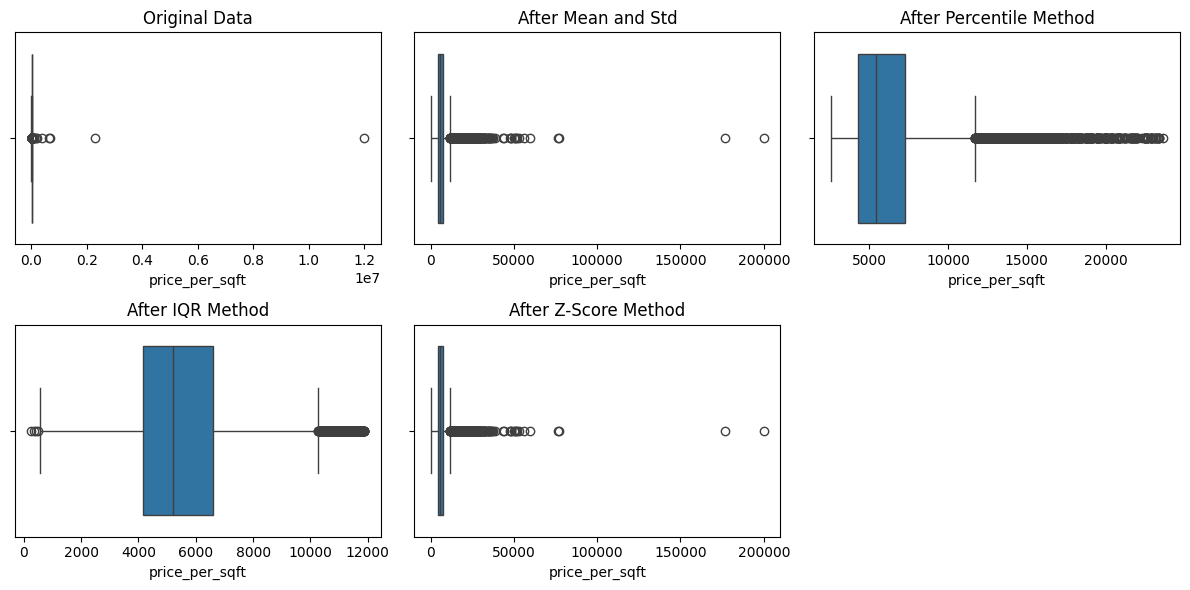

In [30]:
# Create boxplots for original and cleaned data for each method
plt.figure(figsize=(12, 6))

# Box plot for original data
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='price_per_sqft')
plt.title('Original Data')

# Box plot after Mean-Std method
plt.subplot(2, 3, 2)
sns.boxplot(data=df_no_outliers_mean_std, x='price_per_sqft')
plt.title('After Mean and Std')

# Box plot after Percentile method
plt.subplot(2, 3, 3)
sns.boxplot(data=df_no_outliers_percentile, x='price_per_sqft')
plt.title('After Percentile Method')

# Box plot after IQR method
plt.subplot(2, 3, 4)
sns.boxplot(data=df_no_outliers_IQR, x='price_per_sqft')
plt.title('After IQR Method')

# Box plot after Z-Score method
plt.subplot(2, 3, 5)
sns.boxplot(data=df_no_outliers_zscore, x='price_per_sqft')
plt.title('After Z-Score Method')

plt.tight_layout()
plt.show()


IQR method worked best for this data to remove outliers

### Histograam

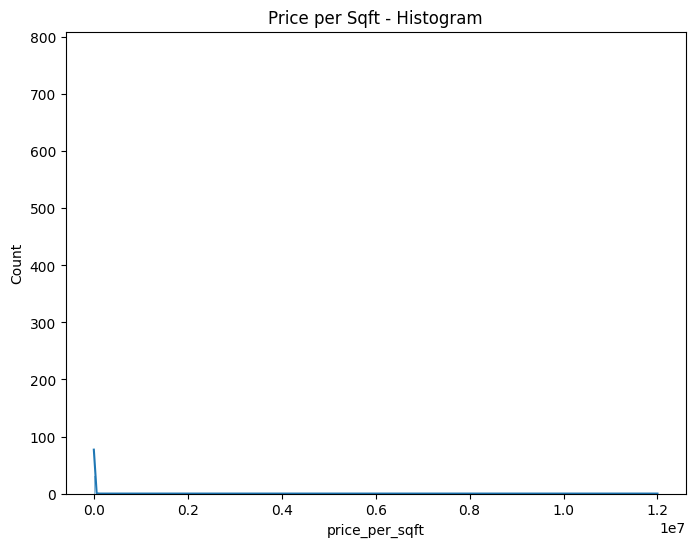

Skewness before transformation: 108.26875024325159
Kurtosis before transformation: 12090.633538860382


In [40]:
# Histogram and check normality
plt.figure(figsize=(8, 6))
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Price per Sqft - Histogram')
plt.show()

# Skewness and Kurtosis before transformation
print("Skewness before transformation:", skew(df['price_per_sqft']))
print("Kurtosis before transformation:", kurtosis(df['price_per_sqft']))


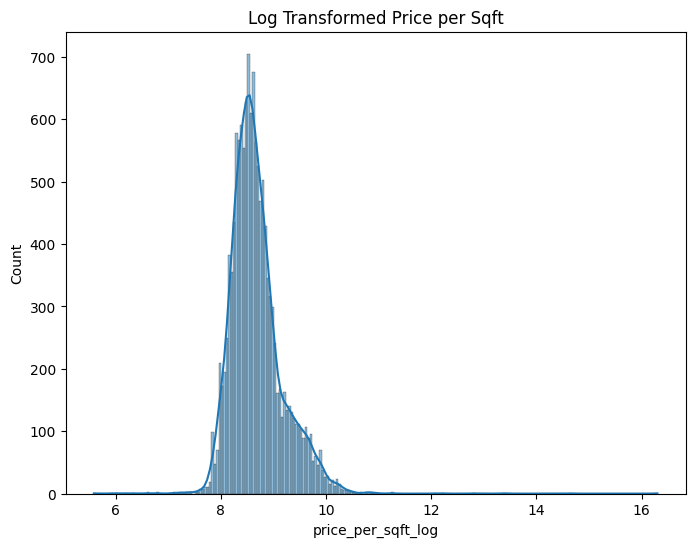

Skewness after transformation: 1.3997035748119977
Kurtosis after transformation: 9.199636085376468


In [41]:
# Transformation: Log transformation
df['price_per_sqft_log'] = np.log(df['price_per_sqft'])

# Histogram after transformation
plt.figure(figsize=(8, 6))
sns.histplot(df['price_per_sqft_log'], kde=True)
plt.title('Log Transformed Price per Sqft')
plt.show()

# Skewness and Kurtosis after transformation
print("Skewness after transformation:", skew(df['price_per_sqft_log']))
print("Kurtosis after transformation:", kurtosis(df['price_per_sqft_log']))

### Correlation

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Convert the 'location' column to numeric
df['location_encoded'] = encoder.fit_transform(df['location'])

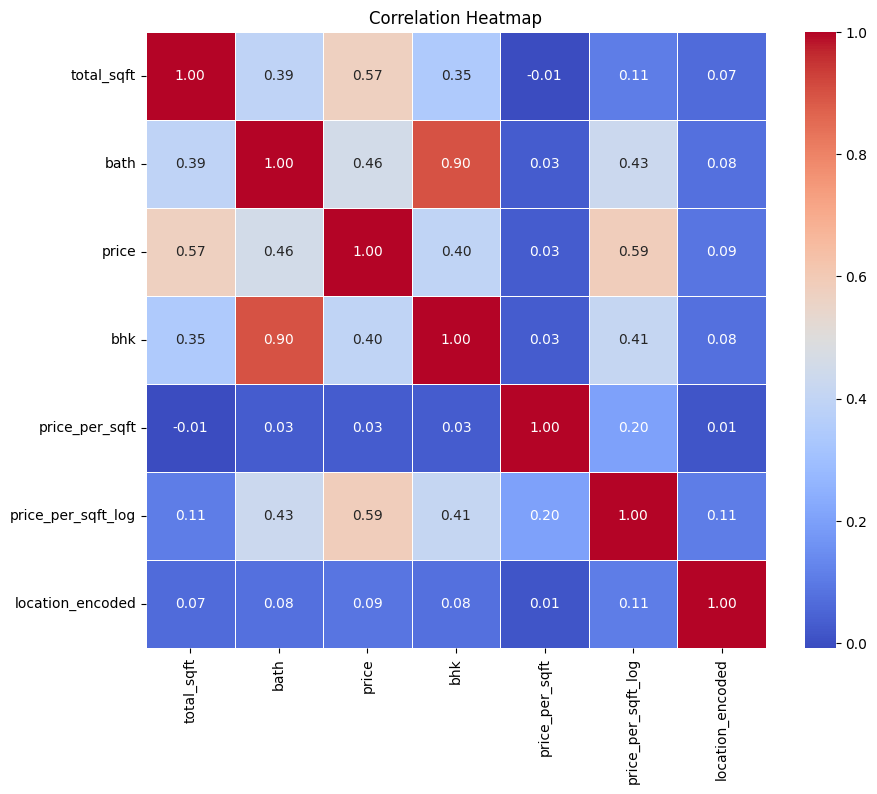

In [35]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Scatter Plot

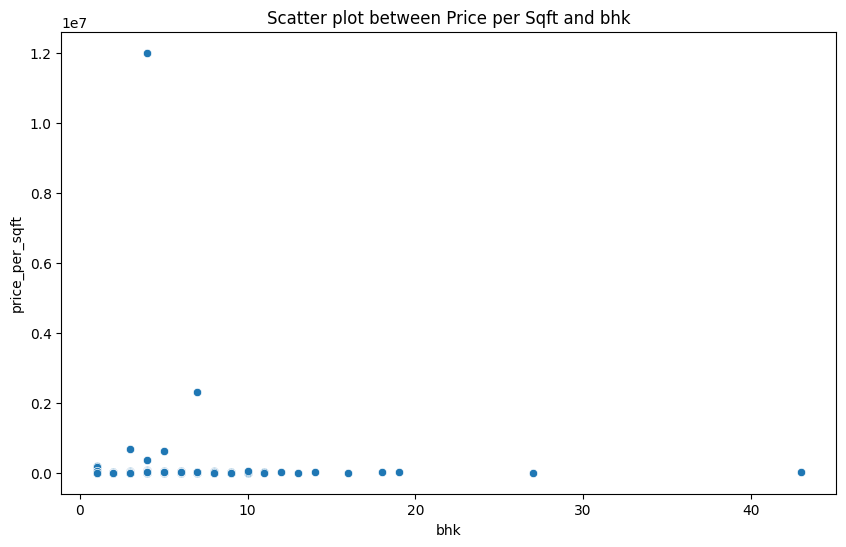

In [39]:
# Scatter plot between two features: price_per_sqft and other features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['bhk'], y=df['price_per_sqft'])  
plt.title('Scatter plot between Price per Sqft and bhk')
plt.show()
